# **Functions and Data**

In [ ]:
#import some python modules
import scipy , itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from google.colab import drive
drive.mount ('/content/drive')

plt.style.use ('bmh'); sns.set()

Mounted at /content/drive


In [ ]:
#Import data
price = pd.read_csv('/content/drive/MyDrive/01. Materi Kuliah UBP Karawang/Data Mining/Kode/Data/price.csv')

In [ ]:
# Ukuran Data
N, P = price.shape
print('baris = ', N, ', Kolom = ', P)

baris =  936 , Kolom =  10


In [ ]:
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
# Perhatikan df sebagaimana semua variable di Python diperlakukan seperti object
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Observation    936 non-null    int64  
 1   Dist_Taxi      923 non-null    float64
 2   Dist_Market    923 non-null    float64
 3   Dist_Hospital  935 non-null    float64
 4   Carpet         928 non-null    float64
 5   Builtup        921 non-null    float64
 6   Parking        936 non-null    object 
 7   City_Category  936 non-null    object 
 8   Rainfall       936 non-null    int64  
 9   House_Price    936 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 73.2+ KB


In [ ]:
# "Mengintip" beberapa data pertamanya
price.head(10)

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
5,6,6665.0,5142.0,9972.0,1442.0,1733.0,Open,CAT B,760,4526000
6,7,13153.0,11869.0,17811.0,1542.0,1858.0,No Parking,CAT A,1030,7224000
7,8,5882.0,9948.0,13315.0,1261.0,1507.0,Open,CAT C,1020,3772000
8,9,7495.0,11589.0,13370.0,1090.0,1321.0,Not Provided,CAT B,680,4631000
9,10,8233.0,7067.0,11400.0,1030.0,1235.0,Open,CAT C,1130,4415000


In [ ]:
# "Mengintip" beberapa data akhirnya
price.tail(7)

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
929,930,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,931,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
935,936,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


In [ ]:
# chosen at random
price.sample(8)

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
839,840,8681.0,13158.0,15062.0,1850.0,2214.0,Covered,CAT A,1110,8500000
790,791,7376.0,12607.0,11282.0,1655.0,1993.0,Not Provided,CAT A,440,8689000
267,268,8228.0,13686.0,13223.0,1439.0,1735.0,Not Provided,CAT A,400,6247000
574,575,9684.0,11953.0,15162.0,1614.0,1938.0,Open,CAT B,1110,5323000
325,326,8362.0,9041.0,13899.0,1566.0,1889.0,Covered,CAT B,610,5640000
696,697,10985.0,13935.0,16737.0,1410.0,1692.0,Open,CAT A,790,7380000
454,455,6669.0,11500.0,11948.0,1249.0,1503.0,Open,CAT A,950,6197000
590,591,5738.0,8270.0,10242.0,1748.0,2092.0,Open,CAT B,580,4917000


# **Removing Variables**

In [ ]:
price.head(10)

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
5,6,6665.0,5142.0,9972.0,1442.0,1733.0,Open,CAT B,760,4526000
6,7,13153.0,11869.0,17811.0,1542.0,1858.0,No Parking,CAT A,1030,7224000
7,8,5882.0,9948.0,13315.0,1261.0,1507.0,Open,CAT C,1020,3772000
8,9,7495.0,11589.0,13370.0,1090.0,1321.0,Not Provided,CAT B,680,4631000
9,10,8233.0,7067.0,11400.0,1030.0,1235.0,Open,CAT C,1130,4415000


In [ ]:
price.describe()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,936.000000,923.000000,923.000000,935.000000,928.000000,921.000000,936.000000,9.360000e+02
mean,468.500000,8239.512459,11039.122427,13082.894118,1511.558190,1794.610206,786.730769,6.089048e+06
std,270.344225,2561.188953,2565.058074,2586.507654,789.370074,467.395372,266.218109,5.015046e+06
min,1.000000,146.000000,1666.000000,3227.000000,775.000000,932.000000,-110.000000,3.000000e+04
25%,234.750000,6481.500000,9366.000000,11308.000000,1318.000000,1583.000000,600.000000,4.661000e+06
50%,468.500000,8233.000000,11166.000000,13179.000000,1481.000000,1775.000000,780.000000,5.879500e+06
75%,702.250000,9967.000000,12688.500000,14848.000000,1653.500000,1982.000000,970.000000,7.187250e+06
max,936.000000,20662.000000,20945.000000,23294.000000,24300.000000,12730.000000,1560.000000,1.500000e+08


In [ ]:
# Drop kolom pertama karena tidak berguna (hanya index)
price.drop("Observation", axis=1, inplace=True)
price.dtypes

Dist_Taxi        float64
Dist_Market      float64
Dist_Hospital    float64
Carpet           float64
Builtup          float64
Parking           object
City_Category     object
Rainfall           int64
House_Price        int64
dtype: object

In [ ]:
# Merubah tipe data "jika" tidak tepat, contoh:
price.dtypes

Dist_Taxi        float64
Dist_Market      float64
Dist_Hospital    float64
Carpet           float64
Builtup          float64
Parking           object
City_Category     object
Rainfall           int64
House_Price        int64
dtype: object

In [ ]:
# dataframe types: https://pbpython.com/pandas_dtypes.html
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price.dtypes

Dist_Taxi         float64
Dist_Market       float64
Dist_Hospital     float64
Carpet            float64
Builtup           float64
Parking          category
City_Category    category
Rainfall            int64
House_Price         int64
dtype: object

# **Statiska Deskriptif**

In [ ]:
# Statistika Sederhana dari data "Numerik"-nya
price.describe(include='all')

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
count,923.000000,923.000000,935.000000,928.000000,921.000000,936,936,936.000000,9.360000e+02
unique,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Open,CAT B,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,373,365,NaN,NaN
mean,8239.512459,11039.122427,13082.894118,1511.558190,1794.610206,NaN,NaN,786.730769,6.089048e+06
std,2561.188953,2565.058074,2586.507654,789.370074,467.395372,NaN,NaN,266.218109,5.015046e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,NaN,NaN,-110.000000,3.000000e+04
25%,6481.500000,9366.000000,11308.000000,1318.000000,1583.000000,NaN,NaN,600.000000,4.661000e+06
50%,8233.000000,11166.000000,13179.000000,1481.000000,1775.000000,NaN,NaN,780.000000,5.879500e+06
75%,9967.000000,12688.500000,14848.000000,1653.500000,1982.000000,NaN,NaN,970.000000,7.187250e+06


In [ ]:
# ini adalah parameter tambahan jika kita juga ingin mendapatkan statistik sederhana seluruh datanya
# (termasuk data kategorik)
price[['Dist_Taxi','Parking']].describe(include='all')

,Dist_Taxi,Parking
count,923.000000,936
unique,NaN,4
top,NaN,Open
freq,NaN,373
mean,8239.512459,NaN
std,2561.188953,NaN
min,146.000000,NaN
25%,6481.500000,NaN
50%,8233.000000,NaN
75%,9967.000000,NaN


# **Variable Selection**

In [ ]:
# Memilih hanya variable dengan tipe tertentu
price_num = price.select_dtypes(include = ['float64', 'int64'])
price_num.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000


In [ ]:
# Memilih hanya variable dengan tipe tertentu
price_cat = price.select_dtypes(include = ['category'])
price_cat.head()

,Parking,City_Category
0,Open,CAT B
1,Not Provided,CAT B
2,Not Provided,CAT A
3,Covered,CAT B
4,Not Provided,CAT B


In [ ]:
df = pd.get_dummies(price['Parking'], prefix='Park')
df.head()

# **Menggabungkan dengan Data Awal**

In [ ]:
df2 = pd.concat([price, df], axis = 1)
df2.head(5)

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [ ]:
# Choosing some columns manually
X = price[['House_Price','Dist_Market']] 
X[:10]

,House_Price,Dist_Market
0,6649000,5250.0
1,3982000,8186.0
2,5401000,14399.0
3,5373000,11188.0
4,4662000,12629.0
5,4526000,5142.0
6,7224000,11869.0
7,3772000,9948.0
8,4631000,11589.0
9,4415000,7067.0


# **Distribusi nilai pada setiap variabel kategorik**

In [ ]:
# get all unique values of a variable/column
for col in price_cat.columns:
    print(col,': ', set(price[col].unique()))

Parking :  {'No Parking', 'Covered', 'Not Provided', 'Open'}
City_Category :  {'CAT B', 'CAT A', 'CAT C'}


In [ ]:
price['Parking'].unique()

['Open', 'Not Provided', 'Covered', 'No Parking']
Categories (4, object): ['Covered', 'No Parking', 'Not Provided', 'Open']

In [ ]:
# price
# Jika yang dibutuhkan memang hanya nama kolom, maka kita bisa melakukan hal ini untuk menghemat penggunaan memory
numVar = price.select_dtypes(include = ['float64', 'int64']).columns
list(numVar)

['Dist_Taxi',
 'Dist_Market',
 'Dist_Hospital',
 'Carpet',
 'Builtup',
 'Rainfall',
 'House_Price']

In [ ]:
# Distribusi tiap data
price['Parking'].value_counts()
# kita bisa juga visualisasikan informasi ini

Open            373
Not Provided    230
Covered         188
No Parking      145
Name: Parking, dtype: int64

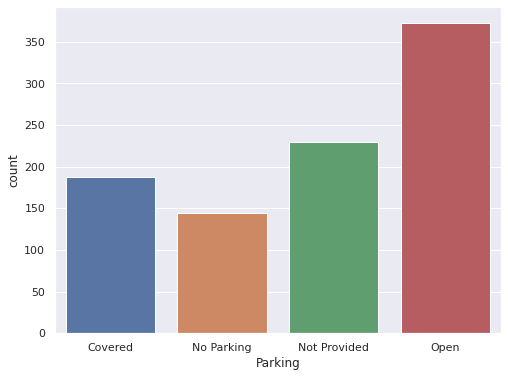

In [ ]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="Parking", data=price)

In [ ]:
# ini dilakukan jika kita ingin menyimpan plotnya ke dalam suatu file
p.figure.savefig('barChart.png')
# lihat di folder ipynb-nya akan muncul file baru.

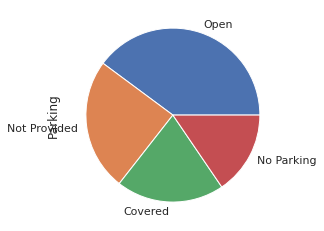

In [ ]:
# PieChart
plot = price.Parking.value_counts().plot(kind='pie')

Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe tempat parkir?

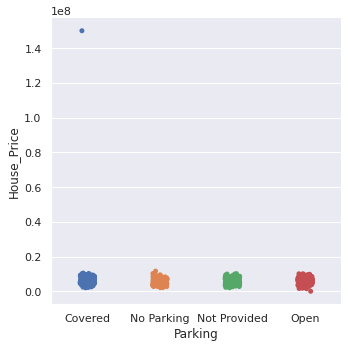

In [ ]:
p= sns.catplot(x="Parking", y="House_Price", data=price)
# Apa yang bisa dilihat dari hasil ini?

# **Univariate Outlier removal**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


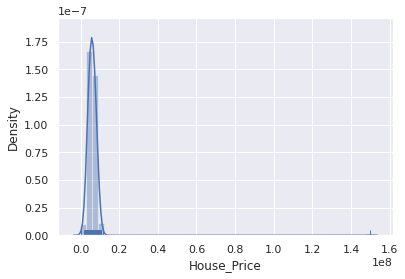

In [ ]:
# Distributions
p = sns.distplot(price['House_Price'], kde=True, rug=True)

In [ ]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 99% confidence interval di sekitar variabel "harga"

df = np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(936,)


0    True
1    True
2    True
3    True
4    True
Name: House_Price, dtype: bool

In [ ]:
price2 = price[df] # Data tanpa outliers
print(price2.shape, price.shape)
price2.head
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "Price2"
# Jika datanya besar hati-hati melakukan hal ini

(935, 9) (936, 9)


<bound method NDFrame.head of      Dist_Taxi  Dist_Market  Dist_Hospital  Carpet  Builtup       Parking  \
0       9796.0       5250.0        10703.0  1659.0   1961.0          Open   
1       8294.0       8186.0        12694.0  1461.0   1752.0  Not Provided   
2      11001.0      14399.0        16991.0  1340.0   1609.0  Not Provided   
3       8301.0      11188.0        12289.0  1451.0   1748.0       Covered   
4      10510.0      12629.0        13921.0  1770.0   2111.0  Not Provided   
..         ...          ...            ...     ...      ...           ...   
931     9297.0      12537.0        14418.0  1174.0   1429.0       Covered   
932    10915.0      17486.0        15964.0  1549.0   1851.0  Not Provided   
933     9205.0      10418.0        14496.0  1118.0   1337.0          Open   
934    10915.0      17486.0        15964.0  1549.0   1851.0  Not Provided   
935    10915.0      17486.0        15964.0  1549.0   1851.0  Not Provided   

    City_Category  Rainfall  House_Price  
0 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


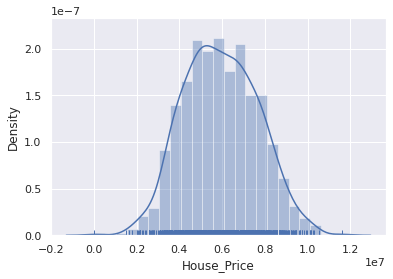

In [ ]:
# Distributions
p = sns.distplot(price2['House_Price'], kde=True, rug=True)

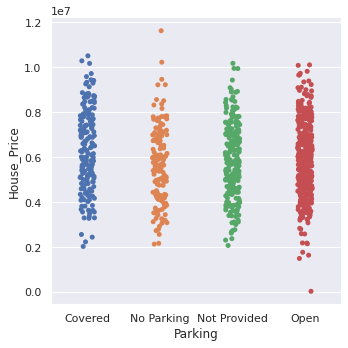

In [ ]:
# Plot lagi setelah outlier removal
p= sns.catplot(x="Parking", y="House_Price", data=price2)
# Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe tempat parkir?

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


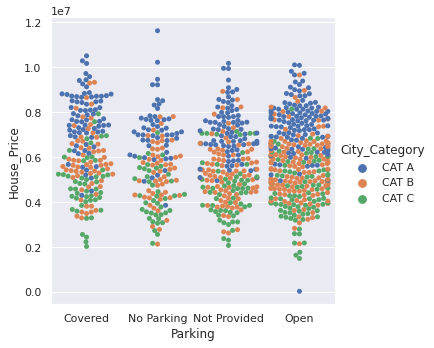

In [ ]:
# Bisa juga plot dengan informasi dari 3 variabel sekaligus
# (untuk melihat kemungkinan faktor interaksi)

p= sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="swarm", data=price2)

# **Missing Values**

In [ ]:
# General Look at the Missing Values
print(price2.isnull().sum())

Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64


In [ ]:
# Simplest solution, if the MV is not a lot
# drop rows with missing values : Ada berbagai cara
X = price.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
price2.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
price2.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
price2.dropna(subset=['Dist_Hospital'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
# inplace=True if really really sure
price2.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
print(price2.isnull().sum())

Dist_Taxi        0
Dist_Market      0
Dist_Hospital    0
Carpet           0
Builtup          0
Parking          0
City_Category    0
Rainfall         0
House_Price      0
dtype: int64


In [ ]:
#mengecek apakah ada duplikat data?
print(price2.shape)
price2.duplicated().sum()

(901, 9)


4

In [ ]:
#menghapus entri yang memiliki data duplikat 
price2.drop_duplicates(inplace=True)
print(price2.duplicated().sum()) # no more duplicates
print(price2.shape) # re-check by printing data size

0
(897, 9)


# **(PairWise) Scatter Plot**

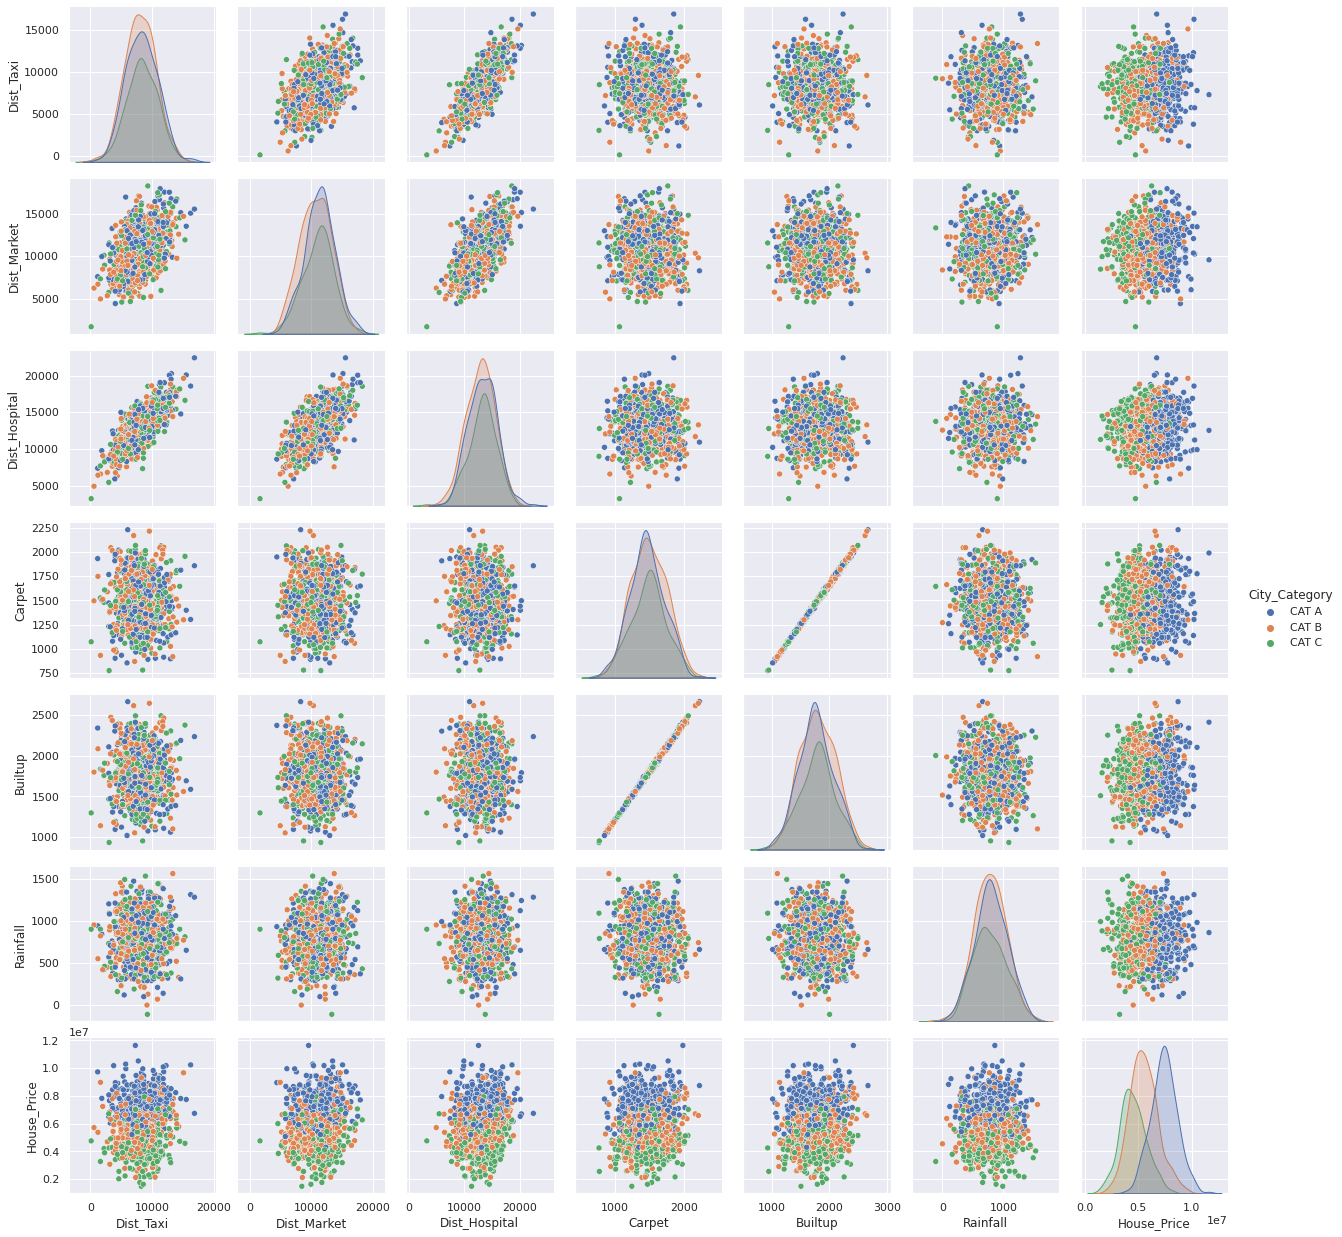

In [ ]:
# Scatter Plots; https://seaborn.pydata.org/generated/seaborn.pairplot.html
p = sns.pairplot(price2, hue="City_Category")
# Warning agak lambat (variabel cukup banyak)

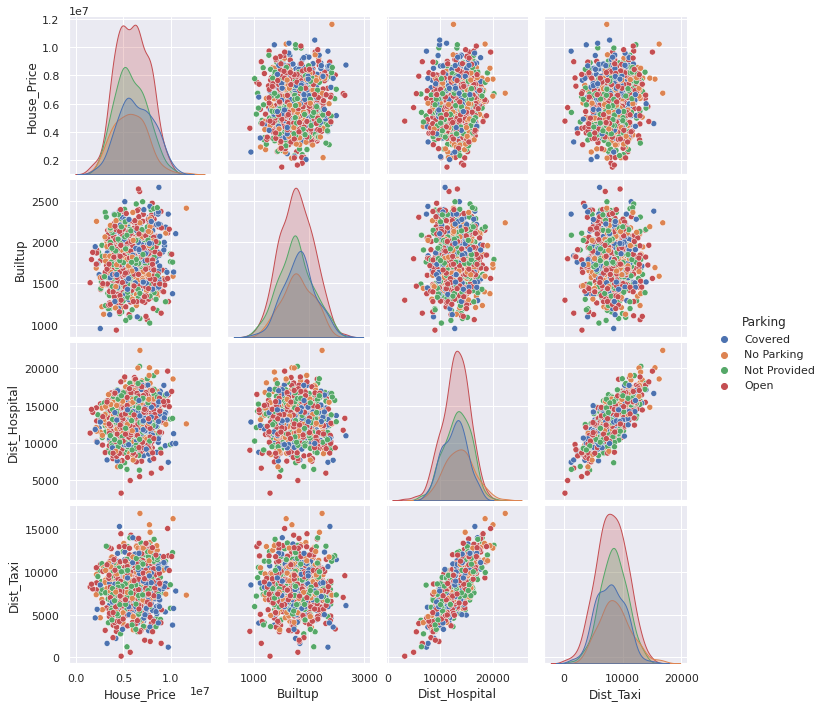

In [ ]:
# Coba kita perhatikan sebagiannya saja dulu dan coba kelompokkan berdasarkan "Parking"
p = sns.pairplot(price2[['House_Price','Builtup','Dist_Hospital','Dist_Taxi','Parking']], hue="Parking")
# Ada pola menarik?

# **Saving (preprocessed) Data**

In [ ]:
# Saving the preprocessed Data for future use/analysis
price2.to_csv("data_01_pricing_PreProcessed.csv", encoding='utf8')

# **Data Grouping**

In [ ]:
# Slicing DataFrame - Just like query in SQL
price2[price2["City_Category"] == "CAT B"].describe()
# Bisa ditambahkan .drop("Parking", axis=1) untuk menghilangkan kolom dengan single value

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,3.470000e+02
mean,8079.703170,10693.945245,12855.314121,1500.380403,1799.806916,780.259366,5.520006e+06
std,2475.693863,2534.441833,2588.293527,252.359775,301.620757,260.422493,1.324843e+06
min,604.000000,4950.000000,4922.000000,869.000000,1050.000000,0.000000,2.130000e+06
25%,6400.500000,8891.000000,11088.500000,1317.000000,1577.500000,590.000000,4.613500e+06
50%,7998.000000,10711.000000,12950.000000,1487.000000,1787.000000,770.000000,5.438000e+06
75%,9794.000000,12535.000000,14685.000000,1688.000000,2023.500000,950.000000,6.369000e+06
max,15082.000000,17101.000000,19617.000000,2214.000000,2647.000000,1560.000000,9.661000e+06


# **BoxPlot**

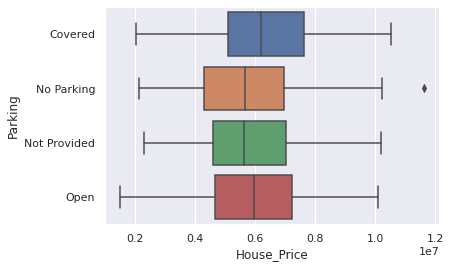

In [ ]:
# BoxPlots
p = sns.boxplot(x="House_Price", y="Parking", data=price2)
# Apa makna pola yang terlihat di data oleh BoxPlot ini?

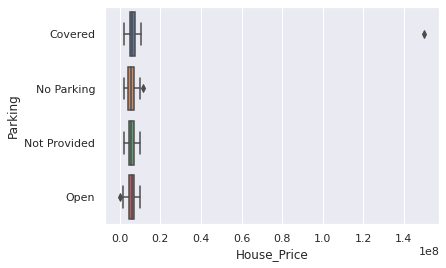

In [ ]:
# Jika ada outlier grafiknya menjadi tidak jelas (data = price, bukan price2)
p = sns.boxplot(x="House_Price", y="Parking", data=price)

Boxplot dapat juga dipisahkan berdasarkan suatu kategori

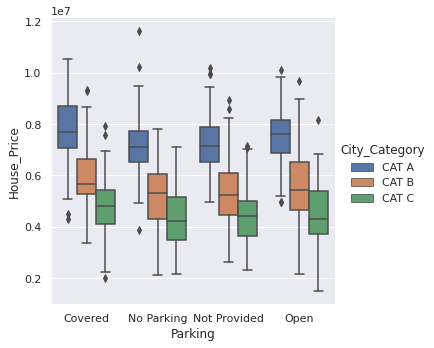

In [ ]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

# **Checking Correlations**

In [ ]:
price2.corr()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
Dist_Taxi,1.000000,0.453479,0.795520,0.008703,0.008230,0.013540,0.103393
Dist_Market,0.453479,1.000000,0.621466,-0.020778,-0.020384,0.069806,0.116795
Dist_Hospital,0.795520,0.621466,1.000000,0.011706,0.011960,0.046826,0.131799
Carpet,0.008703,-0.020778,0.011706,1.000000,0.998885,-0.043485,0.096229
Builtup,0.008230,-0.020384,0.011960,0.998885,1.000000,-0.043424,0.097417
Rainfall,0.013540,0.069806,0.046826,-0.043485,-0.043424,1.000000,0.014383
House_Price,0.103393,0.116795,0.131799,0.096229,0.097417,0.014383,1.000000


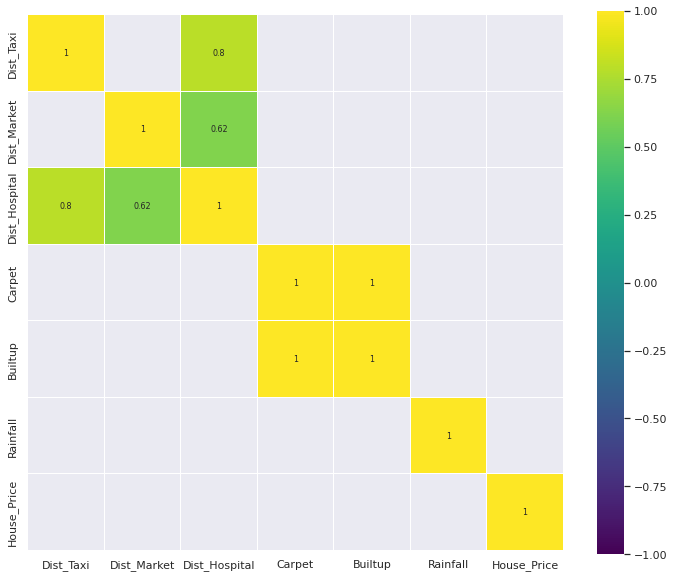

In [ ]:
# HeatMap untuk menyelidiki korelasi
corr2 = price2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

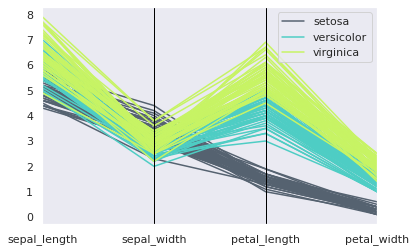

In [ ]:
df_iris = pd.read_csv('/content/drive/MyDrive/01. Materi Kuliah UBP Karawang/Data Mining/Kode/Data/iris.csv')
pd.plotting.parallel_coordinates(df_iris, 'species', color=('#556270', '#4ECDC4', '#C7F464'))
plt.show()